In [285]:
#pip install catboost


In [286]:



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For visualzations and graph creations
%matplotlib inline
import seaborn as sns # For advanced visualizations and graph creations
from sklearn.preprocessing import LabelEncoder # For Feature Engineering Method - Label Encoding
from sklearn.preprocessing import MinMaxScaler # For Normalization
from sklearn.model_selection import train_test_split # For Splitting the data into train data and test data
from sklearn.ensemble import RandomForestRegressor # For Creation of Random Forest Regressor Model
from sklearn.linear_model import LinearRegression # For Creation of Linear Regression Model
from catboost import CatBoostRegressor # For Creation of CatBoost Regressor Model

# Libraries for calculationg Metrics of the Model we create:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



### Importing the Data set:

In [287]:
df = pd.read_csv("./audi.csv")
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [289]:
df.shape

(10668, 9)

In [290]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

As we can see that this data set is already cleaned i.e. it is having no NA Values. But still it doesn't mean that the data doesn't contain noisy data points.

### Outlier Removal:

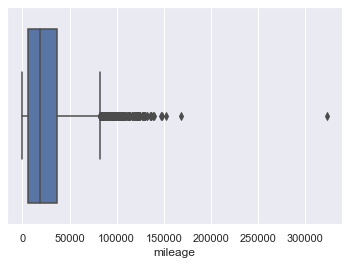

In [291]:
box1 = sns.boxplot(x = 'mileage', data = df)

In [292]:
df[df.mileage > 150000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7404,A3,2009,2490,Manual,152034,Diesel,150,55.4,1.9
9690,Q5,2011,6195,Manual,168017,Diesel,200,42.1,2.0
9822,A6,2008,2490,Manual,323000,Diesel,200,44.1,2.0


In [293]:
df = df.drop([7404,9690,9822])

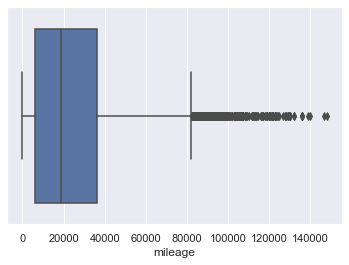

In [294]:
box1 = sns.boxplot(x = 'mileage', data = df)

In [295]:
df.shape

(10665, 9)

Above is the boxplot after removal, this was the boxplot for mileage column:

We can see that there is a car which is above the 300,000 miles driven. This is an outlier hence remoeved it by keeping the range of data points for mileage as 0-1500,000 miles.

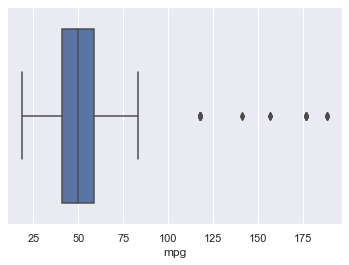

In [296]:
box2 = sns.boxplot(x = 'mpg', data = df)

In [297]:
# can run this code if want to se the whole rows 
# df[df.mpg > 100]

In [298]:
df[df['mpg'] > 100 ]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
864,A3,2020,31990,Semi-Auto,2165,Hybrid,135,141.3,1.4
1104,Q5,2019,44990,Automatic,6565,Hybrid,135,117.7,2.0
1648,Q5,2020,46450,Semi-Auto,3500,Hybrid,135,117.7,2.0
2550,Q7,2017,32998,Semi-Auto,66477,Hybrid,140,156.9,3.0
3106,A3,2015,14981,Semi-Auto,28294,Hybrid,0,188.3,1.4
3489,Q5,2019,44991,Semi-Auto,2010,Hybrid,135,117.7,2.0
3689,Q5,2020,46000,Semi-Auto,4000,Hybrid,135,117.7,2.0
4095,Q5,2019,45490,Automatic,10000,Hybrid,135,117.7,2.0
4261,A3,2015,17990,Automatic,14000,Hybrid,0,188.3,1.4
4314,Q5,2019,44495,Semi-Auto,8700,Hybrid,135,117.7,2.0


In [299]:
df.drop( df[df['mpg'] > 100 ].index , inplace=True)

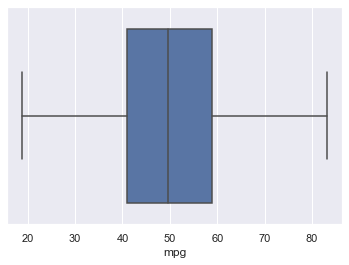

In [300]:
box2 = sns.boxplot(x = 'mpg', data = df)

In [301]:
df.shape

(10632, 9)

We observed that there are outliers ranging from 120 mpg - 200 mpg mileage. We removed those and kept the range of mpg as 0 mpg - 100 mpg.

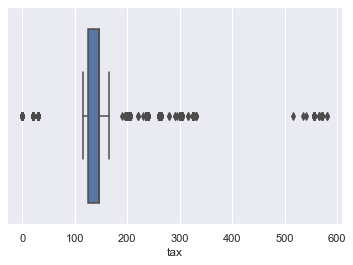

In [302]:
box3 = sns.boxplot(x = 'tax', data = df)

In [303]:
df_tax=df[ (df['tax'] >= 100) & (df['tax'] >= 500) ].index



In [304]:
df.drop(df_tax , inplace=True)

In [305]:
df.shape

(10592, 9)

### Exploratory Data Analysis:

After outlier removal, the data was ready for Exploratory Data Analysis.

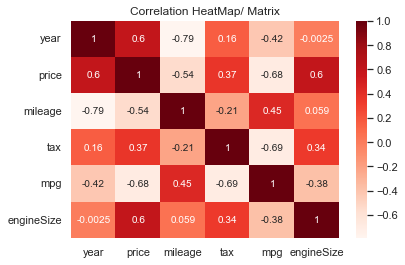

In [306]:
sns.heatmap(df.corr(), cmap ="Reds", annot = True)
plt.title("Correlation HeatMap/ Matrix")
plt.show()

From the Correlation Matrix we get the following information:
- There is a negative correlation price and mileage. This means the car that has driven more has more mileage and therefore the price is lesser since the car is used more.
- There is a  negative correlation with mpg(miles per gallon) and the price. This means that the sports car have less miles per gallon ratio but whereas normal cars have more miles per gallon. So hence the price of the sports car models are more and the normal car models are of lesser price.
- There is positive correlation between price of the car and the engine size of the car. It means that people tend to buy those cars having higher engine size.
- There is a small positive correlation between tax and the price of the car. Cars with higher taxes on them are costlier. Total Price = Selling Price + VAT(Tax applied). ^ inc.

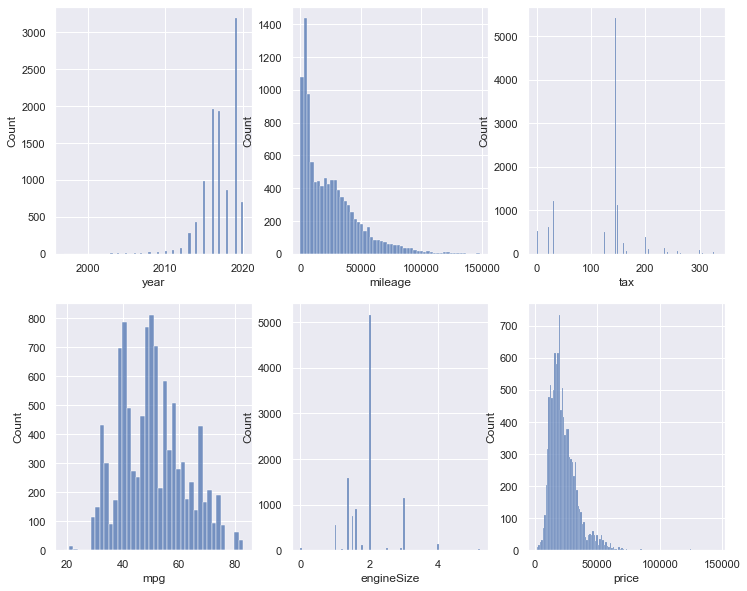

In [307]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 3)
sns.histplot(df["year"], ax = axes[0,0])
sns.histplot(df["mileage"], ax = axes[0,1])
sns.histplot(df["tax"], ax = axes[0,2])
sns.histplot(df["mpg"], ax = axes[1,0])
sns.histplot(df["engineSize"], ax = axes[1,1])
sns.histplot(df["price"], ax = axes[1,2])
plt.show()

For year column, it is right-skewed which means that most of the cars are between 2015 to 2020.
For mileage column, it is left-skewed which means that most of the cars listed are driven for more than 5000 miles.
For engineSize column, the most used cars engine size is between 1.5 lts to 2 lts.

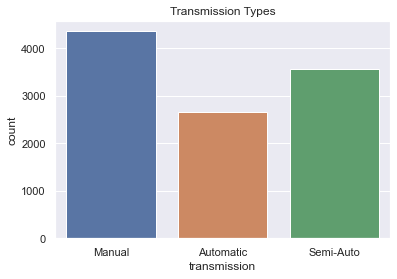

In [308]:
sns.countplot(x = "transmission", data = df)
plt.title("Transmission Types")
plt.show()

This countplot shows us that there are around 2400+ cars which are of Manual Transmission in UK. Around 2000+ cars which are Automatic Transmission in UK and above 2500+ Cars which are Semi-Auto transmission.

In [309]:
print(df['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS5' ' RS4' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2']


These are the unique Audi Models in the data set.

 A3     1913
 Q3     1417
 A4     1380
 A1     1347
 A5      882
 Q5      861
 Q2      822
 A6      746
 Q7      390
 TT      333
 A7      122
 A8      116
 Q8       69
 RS6      34
 RS3      33
 RS5      26
 RS4      23
 S3       18
 R8       18
 SQ5      16
 S4       11
 SQ7       8
 S5        3
 S8        3
 A2        1
Name: model, dtype: int64


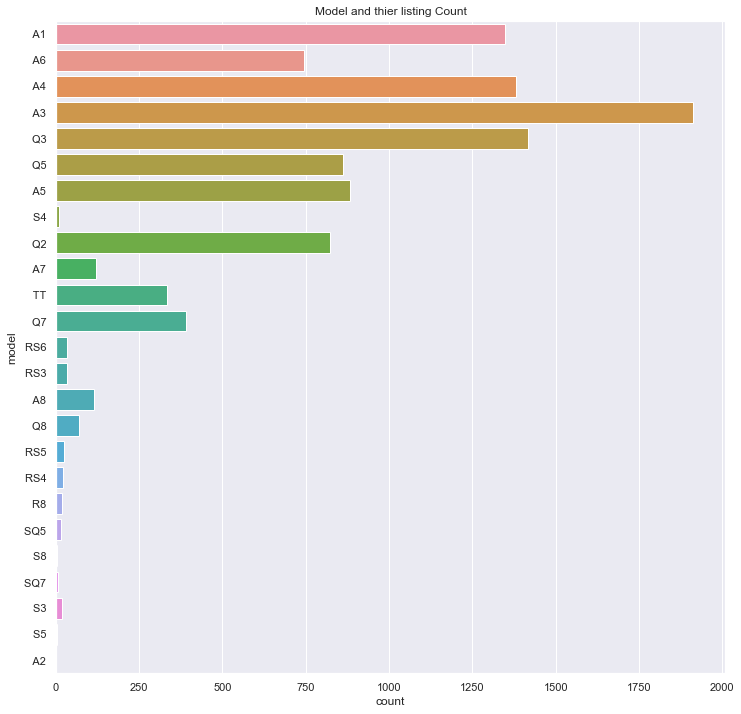

In [310]:
print(df["model"].value_counts())
plt.figure(figsize = (12,12))
sns.countplot(y = df["model"])
plt.title("Model and thier listing Count")
plt.show()

There are more number of Audi A3's then any model.

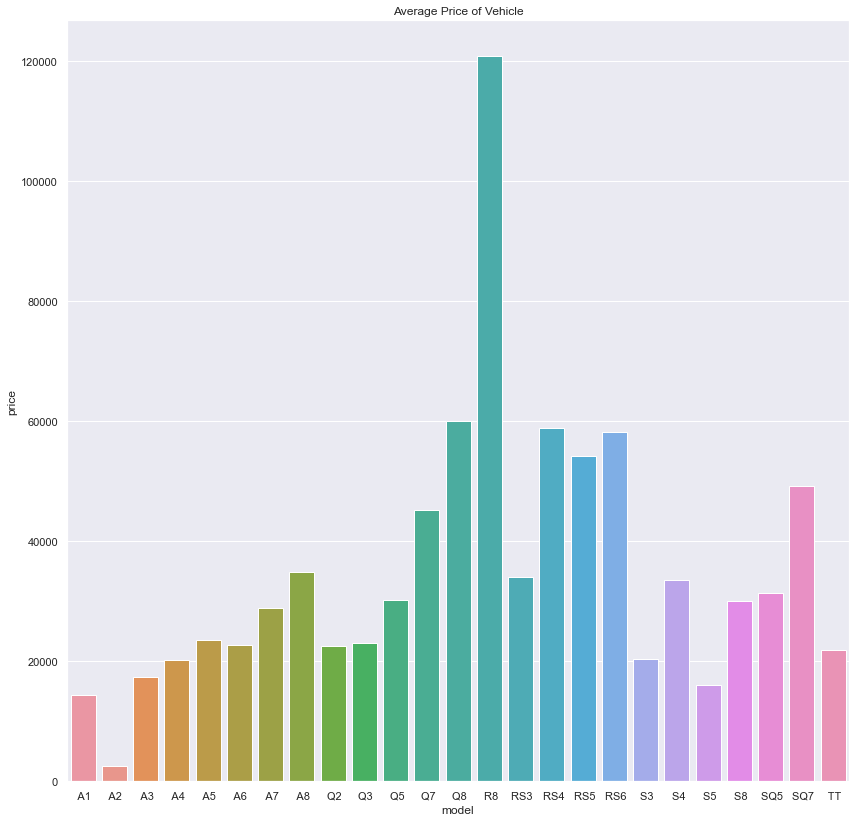

In [311]:
plt.subplots(figsize = (14,14))
priceByModel = df.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of Vehicle")
sns.set()
sns.barplot(x = 'model', y = 'price', data = priceByModel)
plt.show()

The average price of the Audi model R8 is higher than anyone. This is because Audi R8 is a two-seater sports car. It is a very expensive car and hence is priced above than anyone.


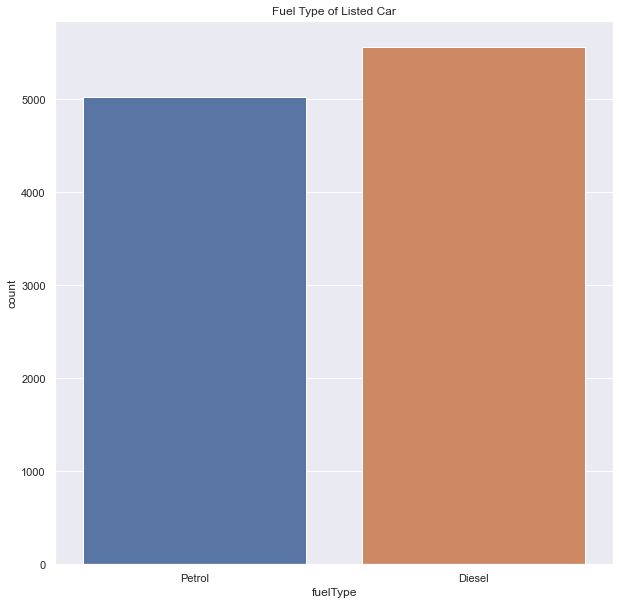

In [312]:
plt.figure(figsize = (10,10))
sns.countplot(x = "fuelType", data = df)
plt.title("Fuel Type of Listed Car")
plt.show()

This shows that the listed cars are of diesel fuel type. Diesel fuel type are at the second place, amongst the listed cars.

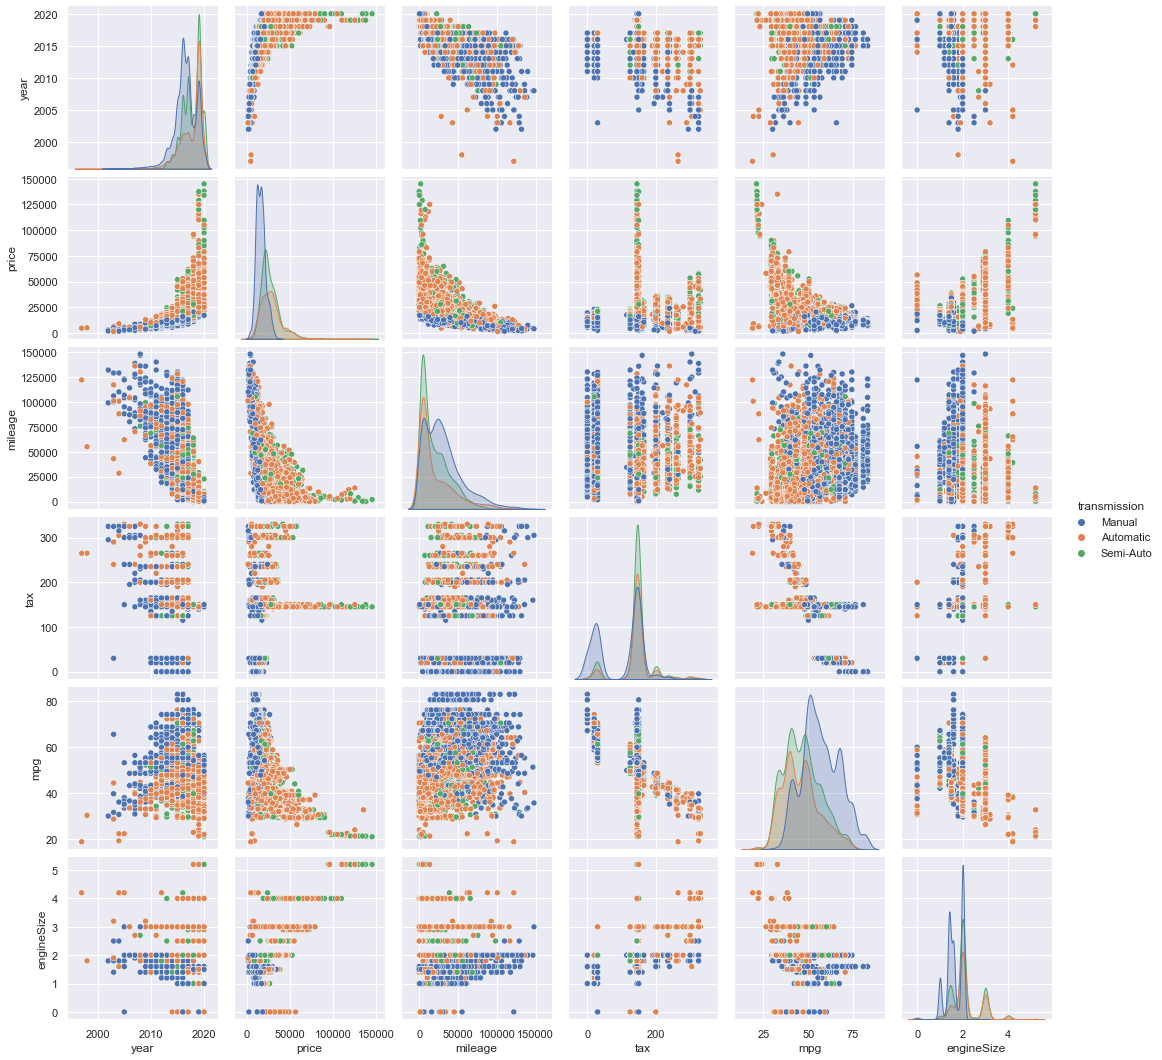

In [313]:
sns.pairplot(df, diag_kind = "kde", hue = "transmission")
plt.show()

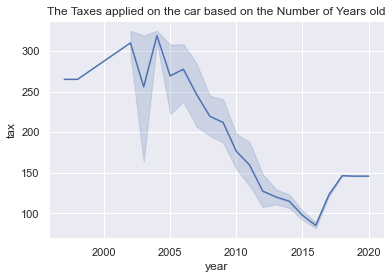

In [314]:
sns.lineplot(x = "year", y = "tax", data = df)
plt.title("The Taxes applied on the car based on the Number of Years old")
plt.show()

By this lineplot we can see that atleast 150 € are the taxes applied on cars which are relatively new i.e. 1-2 years old. In UK, every car needs to pay road tax irrespective of being a used car or a new car. There can been some deviations in the taxes on the specific year-old car. Our assumption is that the taxes are varying because the type of the car too. Like SUVs, Sedans will have more taxes applied on it.

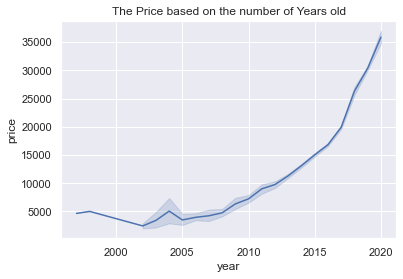

In [315]:
sns.lineplot(x = "year", y = "price", data = df)
plt.title("The Price based on the number of Years old")
plt.show()

By this lineplot we can see that the cars which are relatively new are having higher prices which is obvious because lesser distance the cars have travelled. But we can see that there are some deviations or differeneces in prices of the car which are like 4-5 years old. People have tried to maximize their profit but haven't seen it through.

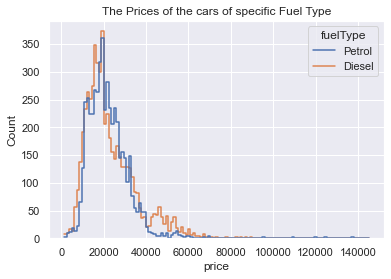

In [316]:
sns.histplot(data = df, x = 'price', hue = 'fuelType', fill = False, element = 'step')
plt.title("The Prices of the cars of specific Fuel Type")
plt.show()

The above visualization shows that the prices of cars of Diesel and Petrol fuel types are having almost similar price range.

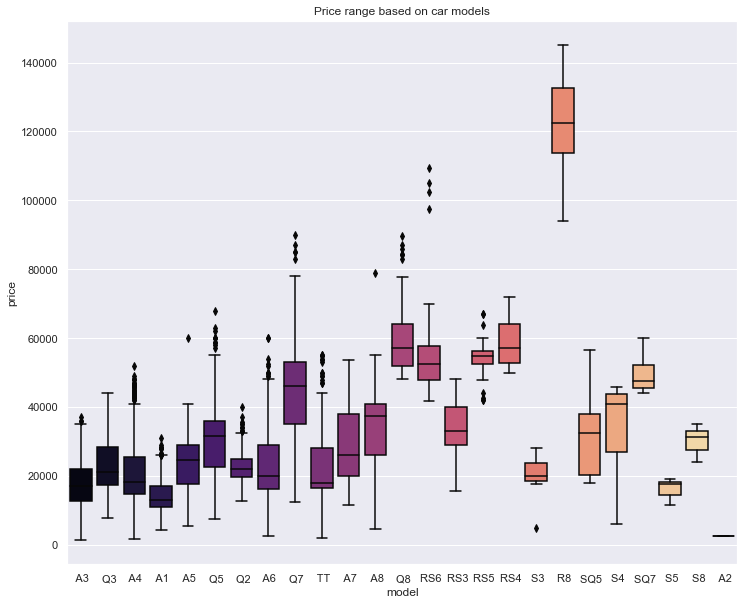

In [317]:
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'model', y = 'price', order = df['model'].value_counts().index, palette = 'magma')
plt.title("Price range based on car models")
plt.show()

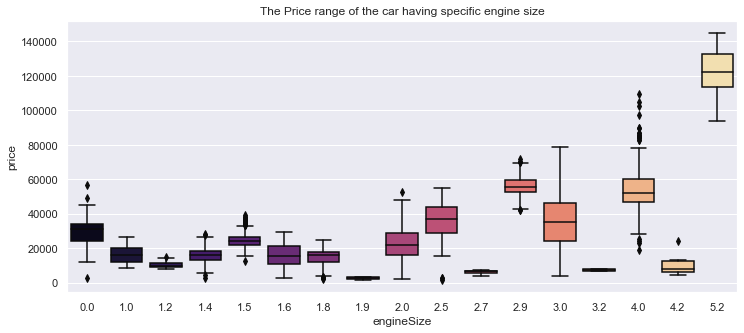

In [318]:
plt.figure(figsize = (12,5))
sns.boxplot(data = df, x = 'engineSize', y = 'price', palette = 'magma')
plt.title("The Price range of the car having specific engine size")
plt.show()

C:\Users\masel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


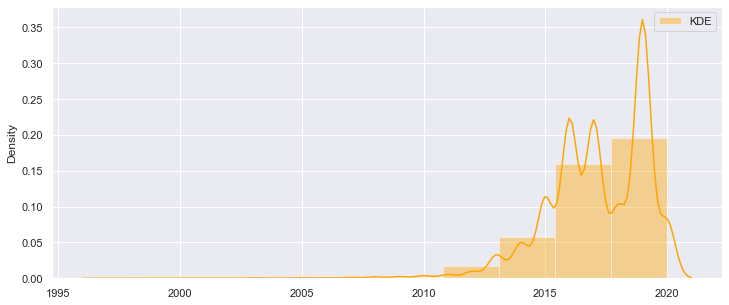

In [319]:
sns.distplot(x = df['year'], bins = 10, color = 'Orange',label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12,5)
plt.show()

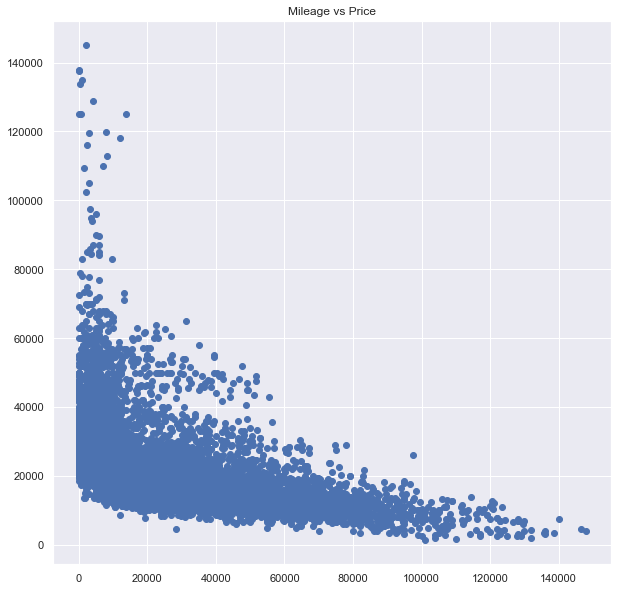

In [320]:
plt.figure(figsize = (10,10))
plt.scatter(x = df['mileage'], y = df['price'])
plt.title("Mileage vs Price")
plt.show()

### Feature Engineering:
#### Label Encoding:

Used the Label Encoding Technique.

In [321]:
encoder = LabelEncoder()
df['model'] = encoder.fit_transform(df['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: ' A1',
 1: ' A2',
 2: ' A3',
 3: ' A4',
 4: ' A5',
 5: ' A6',
 6: ' A7',
 7: ' A8',
 8: ' Q2',
 9: ' Q3',
 10: ' Q5',
 11: ' Q7',
 12: ' Q8',
 13: ' R8',
 14: ' RS3',
 15: ' RS4',
 16: ' RS5',
 17: ' RS6',
 18: ' S3',
 19: ' S4',
 20: ' S5',
 21: ' S8',
 22: ' SQ5',
 23: ' SQ7',
 24: ' TT'}

In [322]:
df['transmission'] = encoder.fit_transform(df['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [323]:
df['fuelType'] = encoder.fit_transform(df['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Petrol'}

In [324]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,1,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,1,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,1,145,49.6,1.0


In [325]:
x = df.drop('price', axis = 1)
y = df['price']

### For Normalization
#### MinMaxScaler

In [326]:
scaler = MinMaxScaler(copy = True, feature_range = (0,1))
X = scaler.fit_transform(x)
X[:10]

array([[0.        , 0.86956522, 0.5       , 0.10631153, 1.        ,
        0.45454545, 0.56853583, 0.26923077],
       [0.20833333, 0.82608696, 0.        , 0.24460976, 0.        ,
        0.06060606, 0.70560748, 0.38461538],
       [0.        , 0.82608696, 0.5       , 0.20233245, 1.        ,
        0.09090909, 0.56853583, 0.26923077],
       [0.125     , 0.86956522, 0.        , 0.17534578, 0.        ,
        0.43939394, 0.75389408, 0.38461538],
       [0.08333333, 0.95652174, 0.5       , 0.01349333, 1.        ,
        0.43939394, 0.47819315, 0.19230769],
       [0.        , 0.82608696, 0.        , 0.21796769, 1.        ,
        0.09090909, 0.62305296, 0.26923077],
       [0.20833333, 0.82608696, 0.        , 0.51883459, 0.        ,
        0.09090909, 0.66199377, 0.38461538],
       [0.125     , 0.82608696, 0.5       , 0.50800343, 0.        ,
        0.06060606, 0.80529595, 0.38461538],
       [0.08333333, 0.7826087 , 0.5       , 0.31156292, 1.        ,
        0.06060606, 0.641744

### Split Dataset 

In [327]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=0)

Have split the data into two parts for model creation: Train Data and Test Data. 80% Train Data and 20% Test Data.

In [328]:
print("Shape of the x_train: ", x_train.shape)
print("Shape of the x_test: ", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the x_train:  (8473, 8)
Shape of the x_test:  (2119, 8)
Shape of y_train: (8473,)
Shape of the y_test:  (2119,)


### Model Creation:
#### Linear Regression Model:

In [329]:
LinearRegressionModel = LinearRegression(fit_intercept = True, normalize = True, copy_X = True, n_jobs = -1)
LinearRegressionModel.fit(x_train, y_train)


print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))

print('----------------------------------------------------')
y_pred = LinearRegressionModel.predict(x_test)  #y prediction(y_pred) is predict from x test
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.8190771413543183
Linear Regression Test Score is :  0.8091294998330134
----------------------------------------------------
Predicted Value for Linear Regression is :  [36585.69587522 19218.94201874 14888.96952523 45026.10187725
 12628.50665236 21950.44731377 20333.89827832 25731.98316597
 35553.37626941 14322.19281938]


In [330]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,2253,33995,36585.695875
1,7680,17650,19218.942019
2,5058,13490,14888.969525
3,4756,51990,45026.101877
4,10476,11495,12628.506652


There is a visible difference between the actual car price listed and the predicted price by Linear Regression model since the accuracy of the model is just 79.31%.

### Random Forest Regressor:

In [331]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])


Random Forest Regressor Train Score is :  0.9766953756186514
Random Forest Regressor Test Score is :  0.960145725870232
Random Forest Regressor No. of features are :  8
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [36180.43766284 17413.81507003 12758.36278545 49180.00913427
 13500.37098549 22333.26271019 20812.87003908 21802.27857471
 25382.49375    13711.72082457]


In [332]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,2253,33995,36180.437663
1,7680,17650,17413.815070
2,5058,13490,12758.362785
3,4756,51990,49180.009134
4,10476,11495,13500.370985


We can observe that there very little visible difference between the actual price of the car listed and the predicted price of the car, predicted by Random Forest Regressor Model, since it is 95.56% accurate.

### CatBoost Regressor by Yandex:

In [333]:
catModel = CatBoostRegressor(verbose = 0, random_state = 33)
catModel.fit(x_train, y_train)
y_pred = catModel.predict(x_test)
r2 = r2_score(y_pred, y_test)
print(f'CatBoost Regressor Model by Yandex r2 score : {r2:0.5f}')

CatBoost Regressor Model by Yandex r2 score : 0.96721


In [334]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,2253,33995,34668.241976
1,7680,17650,17478.861002
2,5058,13490,12416.147016
3,4756,51990,48092.726596
4,10476,11495,13680.841508


We can observe that there very little visible difference between the actual price of the car listed and the predicted price of the car, predicted by CatBoost Regressor Model, since it is 96% accurate.